<a href="https://colab.research.google.com/github/emuanel/Voice-Pathology-Detection/blob/main/raw_signals_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import librosa
import glob 
import numpy as np
from keras.layers import Dense, Input, Embedding, LSTM, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
from statistics import mean, median

DATA: Saarbruecken Voice Database

http://stimmdb.coli.uni-saarland.de/

In [ ]:
pathological_dir = "/content/drive/MyDrive/projektySem2Mgr/IUI/data/pathological/"
pathological_paths = glob.glob(pathological_dir+"*.wav")

healthy_dir = "/content/drive/MyDrive/projektySem2Mgr/IUI/data/healthy/"
healthy_paths = glob.glob(healthy_dir+"*.wav")

X = []
y = []

for pathological in pathological_paths:
    X.append(librosa.load(pathological)[0])
    y.append(1)
    
for healthy in healthy_paths:
    X.append(librosa.load(healthy)[0])
    y.append(0)

In [ ]:
print("Number of healthy: ", y.count(0))
print("Number of pathological: ", y.count(1))

Number of healthy:  641
Number of pathological:  872


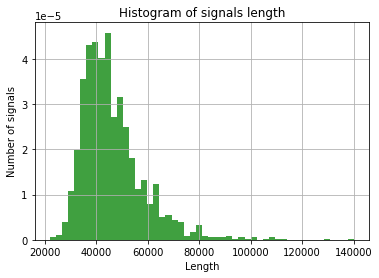

In [ ]:
shapes = []
for i in X:
  shapes.append(i.shape[0])

plt.xlabel('Length')
plt.ylabel('Number of signals')
plt.title('Histogram of signals length')
plt.hist(shapes, 50, density=True, facecolor='g', alpha=0.75)
plt.grid(True)
plt.show()

In [ ]:
lenght_threshold = 70000
X_new = []
for i in X:
  signal_lenght = i.shape[0]
  if signal_lenght>lenght_threshold:
    signal = i[:lenght_threshold]
    signal = np.expand_dims(signal, axis=1) 
    X_new.append(signal)
  else:
    zeros = np.zeros(lenght_threshold-signal_lenght)
    signal = np.concatenate((i, zeros), axis=0)
    signal = np.expand_dims(signal, axis=1) 
    X_new.append(signal)
    
X_new = np.array(X_new)


In [ ]:
input_length = X_new.shape[1]

embedding_size=32
model=Sequential()

model.add(LSTM(200))
model.add(Dropout(0.2))
#model.add(LSTM(100))         #run out of memory on the gpu?
#model.add(Dropout(0.2))
#model.add(LSTM(700))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

X_train, X_test, y_train, y_test = train_test_split(X_new, np.array(y), test_size=0.3, random_state=42)
x_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

batch_size=16
epochs=10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid))

Epoch 1/10
67/67 [==============================] - 767s 11s/step - loss: 0.6878 - accuracy: 0.5703 - val_loss: 0.6812 - val_accuracy: 0.5903
Epoch 2/10
67/67 [==============================] - 771s 12s/step - loss: 0.6829 - accuracy: 0.5798 - val_loss: 0.6767 - val_accuracy: 0.5903
Epoch 3/10
67/67 [==============================] - 770s 12s/step - loss: 0.6816 - accuracy: 0.5798 - val_loss: 0.6804 - val_accuracy: 0.5903
Epoch 4/10
67/67 [==============================] - 768s 11s/step - loss: 0.6824 - accuracy: 0.5798 - val_loss: 0.6786 - val_accuracy: 0.5903
Epoch 5/10
67/67 [==============================] - 768s 11s/step - loss: 0.6821 - accuracy: 0.5798 - val_loss: 0.6790 - val_accuracy: 0.5903
Epoch 6/10
67/67 [==============================] - 768s 11s/step - loss: 0.6826 - accuracy: 0.5798 - val_loss: 0.6770 - val_accuracy: 0.5903
Epoch 7/10
34/67 [==============>...............] - ETA: 5:52 - loss: 0.6739 - accuracy: 0.6066

KeyboardInterrupt: ignored

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

y_pred = model.predict(X_test)
y_pred = np.where(y_pred < 0.5, 0, 1)
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)

plt.subplots(figsize=(10,10))  
sn.heatmap(matrix, annot = True, annot_kws={"size": 10}, fmt = '.1f')

NameError: ignored